### ATSC 405
### Carnot problem for Wednesday 30th March 2016

#### H Thompson

In [66]:
# import modules & functions
from a405skewT.makeSkewII import makeSkewWet
from a405thermo.thermlib import find_rsat 
from a405thermo.thermlib import find_lcl
from a405thermo.thermlib import tinvert_rsat
from a405thermo.thermlib import convertTempToSkew
from a405thermo.thermlib import find_thetaes
from a405thermo.thermlib import find_thetaet
from a405thermo.thermlib import tinvert_thetae
from a405thermo.thermlib import find_Td
from a405thermo.thermlib import tinvert_rsat
from a405thermo.constants import constants as c

In [67]:
# initial parameters
temp_1 = 300   # K
press_1 = 1000   # hPa
RH = 0.8

# finding initial saturation mixing ratio, then mixing ratio and dew point temp
rs_1000 = find_rsat(temp_1, press_1*1.e2)
rv_1000 = rs_1000 * RH
Td_1 = find_Td(rv_1000, press_1*1.e2)

# finding the first lifting condensation level
lcl_1_temp, lcl_1_press = find_lcl(Td_1, temp_1, press_1*1e2)
lcl_1_press = lcl_1_press * 0.01

print('Dew point temp at sfc: %.1f K' %(Td_1))
print('Therefore LCL for lifted sfc parcel: %.1f hPa' %(lcl_1_press))

Dew point temp at sfc: 296.4 K
Therefore LCL for lifted sfc parcel: 948.1 hPa


In [68]:
# entropy during adaibatic ascent should remain constant
thetae_1 = find_thetaes(lcl_1_temp,lcl_1_press*1.e2)

# determining temp at 400 hPa using the constant entropy - no loss of water
press_2 = 400  # hPa
temp_2, rv_400, rl_400 = tinvert_thetae(thetae_1, rv_1000, press_2*1.e2)
rt_400_orig = rv_400 + rl_400

# cool by 20 degC, find new theta_e at 400hPa - account for loss of 80% liquid water
# **confirm the parcel is still saturated**
temp_3 = temp_2 - 20.
rt_400_new = rv_400 + (0.2 * rl_400)
Td_400 = find_Td(rt_400_new, press_2*1.e2 )

if Td_400 >= temp_3:
    print('Dew point is equal to or greater than Temp at 400hPa, therefore parcel must be saturated')
else:
    print('opps, something went wrong... parcel is not satutrated')

Dew point is equal to or greater than Temp at 400hPa, therefore parcel must be saturated


In [69]:
# new entropy due to loss of water
thetae_2 = find_thetaet(Td_400, rt_400_new, temp_3, press_2*1.e2)
print('New theta adiabat to follow down due to losss of liquid water: %.1f K' %(theta_2))

New theta adiabat to follow down due to losss of liquid water: 315.8 K


In [70]:
# since theta will be conserved upon descent we can jump straight to the sfc to get Temp and Td values
# Then work back up to a new LCL that would be hit upon descent
Td_sfc = find_Td(rt_400_new, press_1*1.e2)
temp_sfc, rv_sfc, rl_sfc = tinvert_thetae(thetae_2, rt_400_new, press_1*1.e2)
lcl_2_temp, lcl_2_press = find_lcl(Td_sfc, temp_sfc, press_1*1.e2)
lcl_2_press = lcl_2_press*0.01
print('New LCL that is found on descent: %.1f hPa' %(lcl_2_press))

New LCL that is found on descent: 818.3 hPa


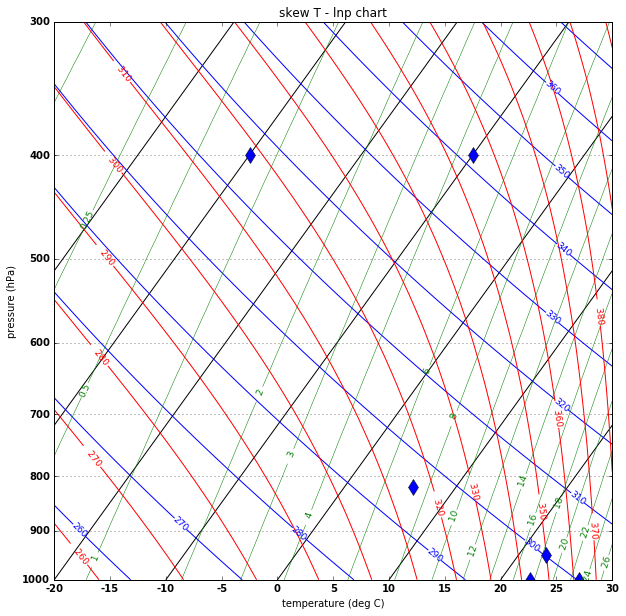

In [71]:
%matplotlib inline

# plotting each point on skew T - ln P plot as a blue diamond 
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax, skew = makeSkewWet(ax, corners=[-20,30])
ax.set(ylim=[1000, 300])

xplot = convertTempToSkew(temp_1-273., press_1, skew)
dot = ax.plot(xplot,press_1, 'bd', markersize=12, markerfacecolor='b')

xplot = convertTempToSkew(lcl_1_temp-273., lcl_1_press, skew)
dot = ax.plot(xplot, lcl_1_press, 'bd', markersize=12, markerfacecolor='b')

xplot = convertTempToSkew(temp_2-273., press_2, skew)
dot = ax.plot(xplot, press_2, 'bd', markersize=12, markerfacecolor='b')

xplot = convertTempToSkew(temp_3-273., press_2, skew)
dot = ax.plot(xplot, press_2, 'bd', markersize=12, markerfacecolor='b')

xplot = convertTempToSkew(lcl_2_temp-273., lcl_2_press, skew)
dot = ax.plot(xplot, lcl_2_press, 'bd', markersize=12, markerfacecolor='b')

xplot = convertTempToSkew(temp_sfc-273., press_1, skew)
dot = ax.plot(xplot, press_1, 'bd', markersize=12, markerfacecolor='b')


In [72]:
# calculate entropy change at 400hPa
dS_400=c.cpd*(np.log(thetae_1) - np.log(theta_2))

# calculate change of entropy at sfc
thetae_sfc  = find_thetaet(Td_sfc, rv_sfc, temp_sfc, press_1*1.e2)
dS_sfc = c.cpd*(np.log(thetae_1) - np.log(thetae_sfc))

print('Change of Entropy at 400hPa: %.1f J/K' %(dS_400))
print('Change of Entropy at the Surface: %.1f J/K' %(dS_sfc))

Change of Entropy at 400hPa: 101.5 J/K
Change of Entropy at the Surface: 101.5 J/K


In [99]:
# changes in enthalpy

qin_h= c.cpd*(temp_2 - temp_1) - c.Rd*temp_2*(np.log(press_2*1.e2) - np.log(press_1*1.e2))

qout_h= c.cpd*(temp_3 - temp_sfc) - c.Rd*temp_3*(np.log(press_2*1.e2) - np.log(press_1*1.e2))

print('Heat absorbed during expansion: %.1f J/kg' %(qin_h))
print('Heat expelled during compression: %.1f J/kg' %(qout_h))

Heat absorbed during expansion: 31995.9 J/kg
Heat expelled during compression: 11056.6 J/kg


In [109]:
# work done
qin = dS_400 * temp_2
qout = dS_sfc * temp_sfc

print('Heat absorbed during expansion: %.1f J/kg' %(qin))
print('Heat expelled during compression: %.1f J/kg' %(qout))

work_done = qin - qout

print('Work done to complete the cycle: %.1f J/kg' %(work_done))

eff = (qin - qout) / qin
eff_percent = eff*100
print('Efficiency of the system: %.2f' %(eff), 'which gives %.1f percent' %(eff_percent))

Heat absorbed during expansion: 26694.7 J/kg
Heat expelled during compression: 29999.5 J/kg
Work done to complete the cycle: -3304.8 J/kg
Efficiency of the system: -0.12 which gives -12.4 percent
